In [ ]:
from radiopy.radiation import u_lum_spec_en
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from physipy import *
import physipy
from physipy.quantity.utils import *
from physipy.quantity.calculus import ndvectorize

from physipy.qwidgets.qipywidgets import QuantityTextSlider


mm = units["mm"]
mum = units["mum"]


setup_matplotlib()
ln = np.log

# Basic units
J = units["J"]
W = units["W"]
nm = units["nm"]
mum = units["mum"]
Hz = units["Hz"]

# Basic constants
c = scipy_constants["c"]
hp = scipy_constants["h"]
kB = scipy_constants["k"]
pi = np.pi


# Custom unit
ph = Quantity(1, Dimension(None), symbol="ph")

# Derived usefull units
u_lum_en = W * m**-2 * sr**-1
u_lum_ph = u_lum_en * ph * s**-1 * W**-1
u_lum_spec_en = u_lum_en / m
u_lum_spec_ph = u_lum_ph / m
u_lum_freq_en = u_lum_en / Hz
u_lum_freq_ph = u_lum_ph / Hz
u_exi_en = u_lum_en * sr
u_exi_ph = u_lum_ph * sr

# Constants
aperys_constant = 1.2020569031595942853997381615114499907649862923405
a_2 = 1.59362426004
a_3 = 2.82143937212
a_4 = 3.9206903948
a_5 = 4.965114231744276
lambert_sol = a_5

In [1]:
from radiopy.radiation import planck_spec_en, wien_displacement_spec_en, lum_max_spec_en, lum_spec_en_bande, planck_spec_en_

# Interactive Ax

In [5]:
%matplotlib ipympl

IAx(children=(Output(), Tab(children=(VBox(children=(FloatSlider(value=0.0, description='xmin', max=1.0), Floa…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
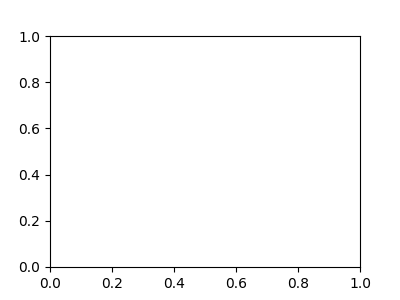

In [7]:
import matplotlib.pyplot as plt
import ipywidgets as ipyw
from physipy.qwidgets.qipywidgets import *
from physipy import setup_matplotlib
setup_matplotlib()

style = {'description_width': 'initial', "width":"50%"}

class IAx(ipyw.HBox):
    xmin = traitlets.Float(allow_none=False)
    xmax = traitlets.Float(allow_none=False)
    ymin = traitlets.Float(allow_none=False)
    ymax = traitlets.Float(allow_none=False)
    xmax_smin = traitlets.Float(allow_none=False)
    xmax_smax = traitlets.Float(allow_none=False)
    xmin_smin = traitlets.Float(allow_none=False)
    xmin_smax = traitlets.Float(allow_none=False)
    fig_size_x = traitlets.Float(allow_none=False)
    fig_size_y = traitlets.Float(allow_none=False)
    
    
    def __init__(self, figsize=(4,3), xfavunit=None, yfavunit=None):
        
        super().__init__()
        
        out_w = ipyw.Output()
        with out_w:
            fig, ax = plt.subplots(figsize=figsize)
        self.fig = fig
        self.fig_size_x = figsize[0]
        self.fig_size_y = figsize[1]
        self.ax = ax
        
        # create widgets
        xmin, xmax = self.ax.get_xlim()
        ymin, ymax = self.ax.get_ylim()
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.xmin_w = ipyw.FloatSlider(self.xmin, min=self.xmin, max=self.xmax, description="xmin")
        self.xmax_w = ipyw.FloatSlider(self.xmax, min=self.xmin, max=self.xmax, description="xmax")
        self.ymin_w = ipyw.FloatSlider(self.ymin, min=self.ymin, max=self.ymax, description="ymin")
        self.ymax_w = ipyw.FloatSlider(self.ymax, min=self.ymin, max=self.ymax, description="ymax")
        title_w = ipyw.Text(description="title")
        xlabel_w = ipyw.Text(description="xlabel")
        ylabel_w = ipyw.Text(description="ylabel")
        grid_enable_w = ipyw.Checkbox(value=False, description="Grid")
        log_y_w = ipyw.Checkbox(value=False, description="Log-y")
        log_x_w = ipyw.Checkbox(value=False, description="Log-x")
        grid_which_w = ipyw.Dropdown(description="which", options=["both", "major", "minor"])
        grid_axis_w = ipyw.Dropdown(description="axis", options=["both", "x", "y"])
        grid_w = ipyw.VBox([grid_enable_w, grid_which_w, grid_axis_w])
        legend_w = ipyw.Button(description="Legend")
        self.lines_w = ipyw.Label()
        self.list_of_lines = []
        self.figsizex_w = ipyw.FloatText(value=self.fig_size_x, description="Figsize x")
        self.figsizey_w = ipyw.FloatText(value=self.fig_size_y, description="Figsize y")
        reset_limits_w = ipyw.Button(description="Reset limits")
        tight_layout_w = ipyw.Button(description="Tight layout")
        style_w = ipyw.Dropdown(description="Style", options=plt.style.available)
        xticksmajor_w = ipyw.Text(description="xticks major", continuous_update=False)
        xticksminor_w = ipyw.Text(description="xticks minor", continuous_update=False)
        yticksmajor_w = ipyw.Text(description="yticks major", continuous_update=False)
        yticksminor_w = ipyw.Text(description="yticks minor", continuous_update=False)
        
        xticksmajorlabel_w = ipyw.Text(description="xticks labels major", continuous_update=False)
        xticksminorlabel_w = ipyw.Text(description="xticks labels minor", continuous_update=False)
        yticksmajorlabel_w = ipyw.Text(description="yticks labels major", continuous_update=False)
        yticksminorlabel_w = ipyw.Text(description="yticks labels minor", continuous_update=False)
        
        xticksmajor_w.value = str(self.ax.get_xticks())
        xticksminor_w.value = str(self.ax.get_xticks(minor=True))
        yticksmajor_w.value = str(self.ax.get_yticks())
        yticksminor_w.value = str(self.ax.get_yticks(minor=True))
        xticksmajorlabel_w.value = str(self.ax.get_xticklabels())
        xticksminorlabel_w.value = str(self.ax.get_xticklabels(minor=True))
        yticksmajorlabel_w.value = str(self.ax.get_yticklabels())
        yticksminorlabel_w.value = str(self.ax.get_yticklabels(minor=True))
        
        
        background_color_w = ipyw.ColorPicker(
        #concise=False,
            description='ax.set_facecolor',
            value='blue',
            disabled=False,
            style=style
        )
        
        
        
        # link widgets
        self.xmin_w.observe(self._update_xmin,                        "value")
        self.xmax_w.observe(self._update_xmax,                        "value")
        self.ymin_w.observe(self._update_ymin,                        "value")
        self.ymax_w.observe(self._update_ymax,                        "value")
        title_w.observe(self._update_title,                      "value")
        xlabel_w.observe(self._update_xlabel,                    "value")
        ylabel_w.observe(self._update_ylabel,                    "value")
        grid_enable_w.observe(self._update_grid_enable,          "value")
        grid_which_w.observe(self._update_grid_which,            "value")
        grid_axis_w.observe(self._update_grid_axis,              "value")
        legend_w.on_click(self._update_legend)
        self.figsizex_w.observe(self._update_figsizex,           "value")
        self.figsizey_w.observe(self._update_figsizey,           "value")
        log_y_w.observe(self._update_logy_scale,                  "value")
        log_x_w.observe(self._update_logx_scale,                  "value")
        reset_limits_w.on_click(self._reset_limits)
        tight_layout_w.on_click(self._tight_layout)
        style_w.observe(self._update_style, "value")
        background_color_w.observe(self._update_bgcolor, "value")
        
        xticksmajor_w.observe(self._update_xticks_major, "value")
        xticksminor_w.observe(self._update_xticks_minor, "value")
        yticksmajor_w.observe(self._update_yticks_major, "value")
        yticksminor_w.observe(self._update_yticks_minor, "value")
        
        xticksmajorlabel_w.observe(self._update_xtickslabels_major, "value")
        xticksminorlabel_w.observe(self._update_xtickslabels_minor, "value")
        yticksmajorlabel_w.observe(self._update_ytickslabels_major, "value")
        yticksminorlabel_w.observe(self._update_ytickslabels_minor, "value")
        
        xmin_link = traitlets.link((self.xmin_w, "value"), (self, "xmin"))
        xmax_link = traitlets.link((self.xmax_w, "value"), (self, "xmax"))
        ymin_link = traitlets.link((self.ymin_w, "value"), (self, "ymin"))
        ymax_link = traitlets.link((self.ymax_w, "value"), (self, "ymax"))
        xmin_xmax_min_link = traitlets.link((self.xmin_w, 'min'), (self.xmax_w, 'min'))
        xmin_xmax_max_link = traitlets.link((self.xmin_w, 'max'), (self.xmax_w, 'max'))
        ymin_ymax_min_link = traitlets.link((self.ymin_w, 'min'), (self.ymax_w, 'min'))
        ymin_ymax_max_link = traitlets.link((self.ymin_w, 'max'), (self.ymax_w, 'max'))

        xmin_smin = traitlets.link((self.xmin_w, "min"),   (self, "xmin_smin"))
        xmin_smax = traitlets.link((self.xmin_w, "max"),   (self, "xmin_smax"))
        xmax_smin = traitlets.link((self.xmax_w, "min"),   (self, "xmax_smin"))
        xmax_smax = traitlets.link((self.xmax_w, "max"),   (self, "xmax_smax"))
        
        figx_link = traitlets.link((self, "fig_size_x"),   (self.figsizex_w, "value"))
        figy_link = traitlets.link((self, "fig_size_y"),   (self.figsizey_w, "value"))
        
                                   
        self.line_box = ipyw.HBox(self.list_of_lines)
            
        tab_titles = ["Limits and scale", "Title and labels", "Grid and ticks", "Others"]
        
        self.tabs = ipyw.Tab()
        
        
        limits_and_scale_box = ipyw.VBox([
                self.xmin_w,
                self.xmax_w,
                self.ymin_w,
                self.ymax_w,
                reset_limits_w,
                log_y_w,
                log_x_w,
        ])
        title_and_labels = ipyw.VBox([
            title_w,
            xlabel_w,
            ylabel_w,
        ])
        grid_and_ticks_box = ipyw.VBox([
            ipyw.HBox([
                ipyw.VBox([
                    xticksmajor_w,
                    xticksminor_w,
                    xticksmajorlabel_w,
                    xticksminorlabel_w,
                ]), 
                ipyw.VBox([
                    yticksmajor_w,
                    yticksminor_w,
                    yticksmajorlabel_w,
                    yticksminorlabel_w,
                ]),
            ]),
            grid_w,
        ])
        others_box = ipyw.VBox([
            self.lines_w,
            legend_w,
            tight_layout_w,
            self.line_box,
            self.figsizex_w,
            self.figsizey_w,
            style_w, 
            background_color_w,
        ])
        self.tabs.children = [
            limits_and_scale_box,
            title_and_labels,
            grid_and_ticks_box,
            others_box,
        ]
        for title, (index, _) in zip(tab_titles, enumerate(self.tabs.children)):
            self.tabs.set_title(index, title)
 
        self.children = [
            out_w,
            self.tabs
        ]
        
    def _update_xtickslabels_minor(self, change):
        try:
            self.ax.set_xticklabels(eval(change.new), minor=True)
        except:
            self.ax.set_xticklabels(change.old, minor=True)
            
    def _update_xtickslabels_major(self, change):
        try:
            self.ax.set_xticklabels(eval(change.new))
        except:
            self.ax.set_xticklabels(change.old)
        
    def _update_ytickslabels_minor(self, change):
        try:
            self.ax.set_yticklabels(eval(change.new), minor=True)
        except:
            self.ax.set_yticklabels(change.old, minor=True)
            
    def _update_ytickslabels_major(self, change):
        try:
            self.ax.set_yticklabels(eval(change.new))
        except:
            self.ax.set_yticklabels(change.old)
    
    def _update_xticks_major(self, change):
        try:
            res = eval(change.new)
            self.ax.set_xticks(res)
        except:
            self.ax.set_xticks(change.old)
            
    def _update_xticks_minor(self, change):
        try:
            res = eval(change.new)
            self.ax.set_xticks(res, minor=True)
        except:
            self.ax.set_xticks(change.old, minor=True)     
            
    def _update_yticks_major(self, change):
        try:
            res = eval(change.new)
            self.ax.set_yticks(res)
        except:
            self.ax.set_yticks(change.old)
            
    def _update_yticks_minor(self, change):
        try:
            res = eval(change.new)
            self.ax.set_yticks(res, minor=True)
        except:
            self.ax.set_yticks(change.old, minor=True)     
        
    def _update_style(self, change):
        """This doesn't work because styles must be declared before figure creation"""
        plt.style.use(change["new"])

    def _update_bgcolor(self, change):
        self.ax.set_facecolor(change['new'])
        
    def _reset_limits(self, change):
        # recompute the ax.dataLim
        self.ax.relim()
        # update ax.viewLim using the new dataLim
        self.ax.autoscale()
        self.ax.autoscale_view()
        
        xmin, xmax = self.ax.get_xlim()
        ymin, ymax = self.ax.get_ylim()
        # update xmin/xmax for ax :
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
    def _tight_layout(self, change):
        self.fig.tight_layout()
        
    def _update_xmin(self, change):
        #_, self.xmax = self.ax.get_xlim()
        self.xmin = change["new"]
        self.ax.set(xlim=(self.xmin, self.xmax))
    
    def _update_xmax(self, change):
        #self.xmin, _ = self.ax.get_xlim()
        self.xmax = change["new"]
        self.ax.set(xlim=(self.xmin, self.xmax))
    
    def _update_ymin(self, change):
        #ymin, _ = self.ax.get_ylim()
        self.ymin = change["new"]
        self.ax.set(ylim=(self.ymin, self.ymax))
    
    def _update_ymax(self, change):
        #xmin, xmax = self.ax.get_ylim()        
        self.ymax = change["new"]
        self.ax.set(ylim=(self.ymin, self.ymax))
    
    def _update_title(self, change):
        self.ax.set(title=change["new"])
    
    def _update_xlabel(self, change):
        self.ax.set(xlabel=change["new"])
    
    def _update_ylabel(self, change):
        self.ax.set(ylabel=change["new"])
    
    def _update_grid_enable(self, change):
        self.ax.grid(b=change["new"])

    def _update_grid_which(self, change):
        self.ax.grid(which=change["new"])

    def _update_grid_axis(self, change):
        self.ax.grid(axis=change["new"])
        
    def _update_legend(self, b):
        """Not working after line was removed"""
        handles, labels = self.ax.get_legend_handles_labels()
        if len(handles)>0:
            try:
                self.ax.legend()
            except:
                self.ax.get_legend().remove()
            
    def _update_figsizex(self, change):
        x = change['new']
        self.fig.canvas.layout.height = 'auto'
        self.fig.canvas.layout.width = 'auto'
        self.fig_size_x = x
        self.fig.set_size_inches(self.fig_size_x,
                                 self.fig_size_y,
                                forward=True)
        
    def _update_figsizey(self, change):
        y = change["new"]
        self.fig.canvas.layout.height = 'auto'
        self.fig.canvas.layout.width = 'auto'

        self.fig_size_y = y
        self.fig.set_size_inches(self.fig_size_x,
                                 self.fig_size_y,
                                forward=True)
        
    def _update_logy_scale(self, change):
        logy_true = change["new"]
        if logy_true:
            self.ymin = 0.001
            self.ax.set_yscale("log")
        else:
            self.ax.set_yscale("linear")
            
    def _update_logx_scale(self, change):
        logx_true = change["new"]
        if logx_true:
            self.xmin = 0.1
            self.ax.set_xscale("log")
        else:
            self.ax.set_xscale("linear")
    
    def add_integral(self, func, xmin, xmax): 
        from physipy import quad

        integ, prec = quad(func, xmin, xmax)

        
        from matplotlib.patches import Polygon
        def compute_integral_polygon(xmin, xmax, func, ax=self.ax, **kwargs):
            xmin = quantify(xmin)
            xmax = quantify(xmax)
            if ax is None:
                ax = plt.gca()
            ix = np.linspace(xmin, xmax)
            #iy = func(ix, **kwargs)
            try:
                iy = func(ix, **kwargs)
            except: 
                iy = physipy.quantity.utils.asqarray([func(x, **kwargs) for x in ix])
        
            verts = [(xmin/mum, 0),
                     *zip((ix/mum), iy.value), 
                     (xmax/mum, 0)]
            poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', alpha=0.5)
            ax.text(0.5 * (xmin/mum + xmax/mum), np.max(iy.value/5), r"$\int_a^b f(x)\mathrm{d}x$="+f"{integ:.2f}",
                    horizontalalignment='center', fontsize=12)
            res = ax.add_patch(poly)
            return res
        compute_integral_polygon(xmin, xmax, func)
        
        
        
        

    def add_line(self, func, xmin, xmax, xfavunit=None, yfavunit=None, label=""):
        
        ech_x = np.linspace(xmin, xmax)
        
        
        xmin = quantify(xmin)
        xmax = quantify(xmax)

        
        
        # TODO : update x-sliders
        # store a list of xmins and xmaxs
        # store a list of lines
        # if no xmin/xmax, use the current min/max
        
        # remove lines : ax.ax.lines[0].remove()
        # update legend when removing
        # use self.favunit
        
        
        if hasattr(func, "name"):
            label = func.name
        # compute ys
        try:
            ech_y = func(ech_x)
        except: 
            ech_y = physipy.quantity.utils.asqarray([func(x) for x in ech_x])
            
        # plot
        if xfavunit is None:
            if yfavunit is None:
                lines = self.ax.plot(ech_x, ech_y, label=label)
        else:
            ech_x.favunit = xfavunit
            ech_y.favunit = yfavunit
            lines = self.ax.plot(ech_x, ech_y, label=label)

        
            
        self.ax.relim()
        self.ax.autoscale()
        
        xmin, xmax = self.ax.get_xlim()
        ymin, ymax = self.ax.get_ylim()
        # update xmin/xmax for ax :
        if xmin < self.xmin_w.min:
            self.xmin_w.min = xmin
            self.xmin = xmin
        if ymin < self.ymin_w.min:
            self.ymin_w.min = ymin
            self.ymin = ymin
        if xmax > self.xmax_w.max:
            self.xmax_w.max = xmax
            self.xmax = xmax
        if ymax > self.ymax_w.max:
            self.ymax_w.max = ymax
            self.ymax = ymax
        
        #self.xmin = xmin
        #self.xmax = xmax
         
            
            
        self.list_of_lines.append(label)
        self.lines_w.value = str(self.list_of_lines)
        
    def add_iline(self, func, xmin, xmax, params, label=""):
        # create widgets to controls additional args
        
        pass
    
    def show_abaq(self, func, xmin, xmax, p_list):
        ech_x = np.linspace(xmin, xmax)
        xmin = quantify(xmin)
        xmax = quantify(xmax)
        rotmode = "anchor"
        ha = va = "center"
        for p in p_list:
            # compute ys
            try:
                ech_y = func(ech_x, p)
            except: 
                ech_y = physipy.quantity.utils.asqarray([func(x, p) for x in ech_x])
            lines = self.ax.plot(ech_x, ech_y, "--", color="gray", alpha=0.5)#, label=label)
            x_text = np.mean(ech_x)
            idx = (np.abs(ech_x - x_text)).argmin()
            delta = 1
            dy = func(ech_x[idx+delta], p)-func(ech_x[idx-delta], p)
            dx = ech_x[idx+delta] - ech_x[idx-delta]
            angle_rad = np.arctan((dy/dx).value/1e7/1e6)
            #self.ax.plot(physipy.quantity.utils.asqarray([ech_x[idx+delta], ech_x[idx-delta]]), 
            #             physipy.quantity.utils.asqarray([func(ech_x[idx+delta], p), func(ech_x[idx-delta], p)]),
            #              "o")
            #self.ax.plot(x_text, func(x_text, p), "o")
            #self.ax.plot()
            txt = self.ax.text(x_text, func(x_text, p), f"{p:.2f}", 
                               size=5, color="gray",
                               alpha=0.8,
                               rotation=angle_rad*180/np.pi,#np.arctan(pente*180/np.pi), 
                               horizontalalignment=ha,
                               verticalalignment="bottom", 
                               rotation_mode=rotmode)

        

                
    
            
    def remove_line(self, n, label=None):
        self.ax.lines[n].remove()
        self.list_of_lines.pop(n)
        self.lines_w.value = str(self.list_of_lines)
        self.ax.legend()
        
ax = IAx()
ax

display(ax)

In [8]:
ax.ax.get_xticks(minor=True)

[]

In [9]:
ax.add_line(lambda l: planck_spec_en(l, 250*K), 2*mum, 20*mum, xfavunit=mum, yfavunit=u_lum_spec_en, label="planck(250K)")

NameError: name 'mum' is not defined

In [8]:
ax.add_integral(lambda l:planck_spec_en(l, 250*K), 2*mum, 15*mum)

In [9]:
ax.show_abaq(lambda l, T:planck_spec_en(l, T), 2*mum, 20*mum, [T_K*K for T_K in np.linspace(250, 350, 11)])

In [10]:
ax.add_line(lambda l: planck_spec_en(l, 350*K), 2*mum, 20*mum, xfavunit=mum, label="planck(350)")

https://stackoverflow.com/questions/19353576/curved-text-rendering-in-matplotlib

https://stackoverflow.com/questions/44143395/align-arbitrarily-rotated-text-annotations-relative-to-the-text-not-the-boundin/44143396#44143396

In [11]:
ax.ax.set_yscale('log')

In [12]:
print(ax.list_of_lines)

['planck(250K)', 'planck(350)']


In [13]:
ax.remove_line(0)

In [15]:
# integral computation
#from matplotlib.patches import Polygon
#ix = np.linspace(lmbda_min_int, lmbda_max_int)
#iy = planck_spec_en_(ix, T)
#verts = [(lmbda_min_int.value*1e6, 0), *zip(ix.value*1e6, iy.value), (lmbda_max_int.value*1e6, 0)]
#poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
#ax.add_patch(poly)

from matplotlib.patches import Polygon
def compute_integral_polygon(xmin, xmax, func, ax=None, **kwargs):
    xmin = quantify(xmin)
    xmax = quantify(xmax)
    if ax is None:
        ax = plt.gca()
    ix = np.linspace(xmin, xmax)
    iy = func(ix, **kwargs)
    verts = [(xmin, 0*xmin), *zip(ix, iy), (xmax, 0*xmax)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    res = ax.add_patch(poly)
    return res
    


### use ndvectorize and lambda function
 - dirty
 - lose favunit

In [3]:
%matplotlib ipympl

In [17]:
import ipywidgets as ipyw
T = 300*K
T_min = 250*K
T_max = 350*K

planck = ndvectorize(lambda lmbda: planck_spec_en(lmbda, T))

ech_x_lmbda = np.linspace(0.2, 15, 100) * mum
ech_x_lmbda.favunit = mum
ech_y = planck(ech_x_lmbda)

ech_T = np.linspace(T_min, T_max, 100)
wien_lmbda = ndvectorize(lambda T:wien_displacement_spec_en(T))(ech_T)


lmbda_min_int = 4*mum
lmbda_max_int = 6*mum
int_init = lum_spec_en_bande(lmbda_min_int, lmbda_max_int, T)



/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:680: UserWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.")


In [18]:
lum_max = ndvectorize(lambda T:lum_max_spec_en(T))(ech_T)

In [19]:
out_w = ipyw.Output()

with out_w:    
    fig, ax = plt.subplots()
    ax.plot(ech_x_lmbda, ech_y, label="$"+planck_spec_en.latex+"$")
    ax.plot(wien_lmbda, lum_max, label="lum max")
    
    # Make the shaded region
    from matplotlib.patches import Polygon
    ix = np.linspace(lmbda_min_int, lmbda_max_int)
    iy = planck_spec_en_(ix, T)
    verts = [(lmbda_min_int.value*1e6, 0), *zip(ix.value*1e6, iy.value), (lmbda_max_int.value*1e6, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)
    print(poly)
    plt.legend()

    
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

xechmin = min(ech_x_lmbda).value*1e6
xechmax = max(ech_x_lmbda).value*1e6

xechmin_w = ipyw.FloatSlider(xechmin, min=xechmin, max=xechmax, description="xechmin")
xechmax_w = ipyw.FloatSlider(xechmax, min=xechmin, max=xechmax, description="xechmax")

xmin_w = ipyw.FloatSlider(xmin, min=xmin, max=xmax, description="xmin")
xmax_w = ipyw.FloatSlider(xmax, min=xmin, max=xmax, description="xmax")
ymin_w = ipyw.FloatSlider(ymin, min=ymin, max=ymax, description="ymin")
ymax_w = ipyw.FloatSlider(ymax, min=ymin, max=ymax, description="ymax")
title_w = ipyw.Text(description="title")
xlabel_w = ipyw.Text(description="xlabel")
ylabel_w = ipyw.Text(description="ylabel")
line_legend_w = ipyw.Text(description="line legend")
temp_w = ipyw.FloatSlider(300, min=T_min.value, max=T_max.value, description="Temperature(K)")
nech_w = ipyw.IntSlider(min=10, max=500, description="n")

#with out_w:
#    fig, ax = plt.subplots(figsize=(6, 4))
#    lines = ax.plot(ech_x_lmbda, ech_y, "o")
#    ax.set(
#        ylabel='Temperature (deg C)',
#        xlabel='$\lambda$',
#        title='Planck',
#    )

box = ipyw.VBox([
    xmin_w,
    xmax_w,
    ymin_w,
    ymax_w,
    title_w,
    xlabel_w,
    ylabel_w,
    line_legend_w,
    temp_w,
    xechmin_w,
    xechmax_w,
    nech_w,
])


def update_xmin(change):
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(change["new"], xmax))


def update_xmax(change):
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(xmin, change["new"]))


def update_ymin(change):
    ymin, ymax = ax.get_ylim()
    ax.set(ylim=(change["new"], ymax))


def update_ymax(change):
    xmin, xmax = ax.get_ylim()
    ax.set(ylim=(ymin, change["new"]))


def update_title(change):
    ax.set(title=change["new"])


def update_xlabel(change):
    ax.set(xlabel=change["new"])


def update_ylabel(change):
    ax.set(ylabel=change["new"])


def update_legend(change):
    if change["new"] == "":
        ax.get_legend().remove()
    else:
        ax.legend([change["new"]])


def update_temp(change):
    func = ndvectorize(lambda lmbda: planck_spec_en(lmbda, change["new"]*K))
    ech_y = func(ech_x_lmbda)
    ech_y.favunit = u_lum_spec_en
    ax.lines[0].set_data(ech_x_lmbda, ech_y)
    res = compute_integral_polygon( ech_x_lmbda.min(), ech_x_lmbda.max(), func, ax=ax)
    ax.patches[0].set_xy(res)
    ax.relim()
    ax.autoscale_view()


def update_echxmin(change):
    temp = temp_w.value
    xmaxech = xechmax_w.value
    nech = nech_w.value
    func = ndvectorize(lambda lmbda: planck_spec_en(lmbda, temp*K))
    ech_x_lmbda = np.linspace(change["new"], xmaxech, nech)*mum
    ech_y = func(ech_x_lmbda)
    ax.lines[0].set_data(ech_x_lmbda, ech_y)
    ax.relim()
    ax.autoscale_view()

    
def update_echxmax(change):
    temp = temp_w.value
    xminech = xechmin_w.value
    nech = nech_w.value
    func = ndvectorize(lambda lmbda: planck_spec_en(lmbda, temp*K))
    ech_x_lmbda = np.linspace(xminech, change["new"], nech)*mum
    ech_y = func(ech_x_lmbda)
    ax.lines[0].set_data(ech_x_lmbda, ech_y)
    ax.relim()
    ax.autoscale_view()

    
def update_nech(change):
    temp = temp_w.value
    xminech = xechmin_w.value
    xmaxech = xechmax_w.value
    nech = nech_w.value
    func = ndvectorize(lambda lmbda: planck_spec_en(lmbda, temp*K))
    ech_x_lmbda = np.linspace(xminech, xmaxech, change["new"])*mum
    ech_y = func(ech_x_lmbda)
    ax.lines[0].set_data(ech_x_lmbda, ech_y)
    ax.relim()
    ax.autoscale_view()

In [20]:
temps = np.linspace(250, 350, 11)*K
print(temps)
x_temps = [wien_displacement_spec_en(T) for T in temps]
y_temps = [lum_max_spec_en(T) for T in temps]

[250. 260. 270. 280. 290. 300. 310. 320. 330. 340. 350.] K


In [21]:
with out_w:
    ax.grid(True, which="both", axis="both")
    for i, txt in enumerate(temps):
        ax.annotate(txt, (x_temps[i], y_temps[i]))

    
xmin_w.observe(update_xmin,          "value")
xmax_w.observe(update_xmax,          "value")
ymin_w.observe(update_ymin,          "value")
ymax_w.observe(update_ymax,          "value")
title_w.observe(update_title,        "value")
xlabel_w.observe(update_xlabel,      "value")
ylabel_w.observe(update_ylabel,      "value")
line_legend_w.observe(update_legend, "value")
temp_w.observe(update_temp,          "value")
xechmin_w.observe(update_echxmin,    "value")
xechmax_w.observe(update_echxmax,    "value")
nech_w.observe(update_nech,          "value")


display(ipyw.HBox([out_w, box]))

In [22]:
fig, ax  = plt.subplots()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib ipympl

In [ ]:
        axis_list = ["stretch", "auto", "fixed"]
        self.axis_ddw = ipyw.Dropdown(options=axis_list, description="Axis scaling:")
        
          

# Wrapped function

11


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
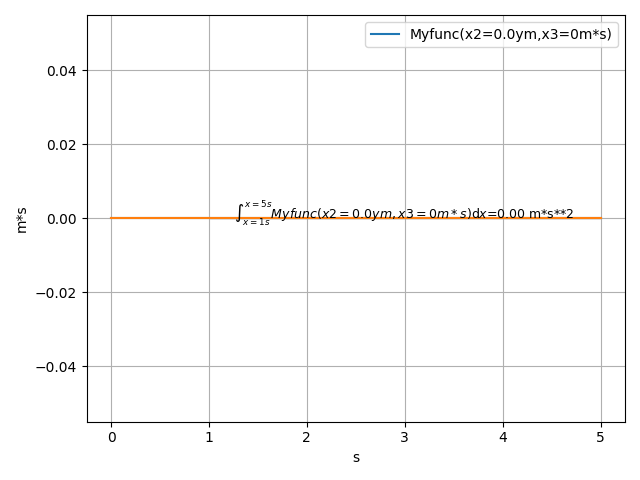

In [9]:
%matplotlib widget

from physipy import m, s
from physipy.qwidgets.plot_ui import WrappedFunction1D
from physipy.quantity.utils import name_eq

@name_eq("Myfunc")        
def func(x1, x2, x3):
    return x1*x2 + 3 * x3

wf = WrappedFunction1D(func, 0*s, 5*s, 
                       x2=(0*m, 5*m),
                       x3=(0*m*s, 5*m*s))

print(wf(1, 2, 3))
p = wf.add_integral(1*s, 5*s)
wf

AttributeError: 'WrappedFunction1D' object has no attribute 'ax'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
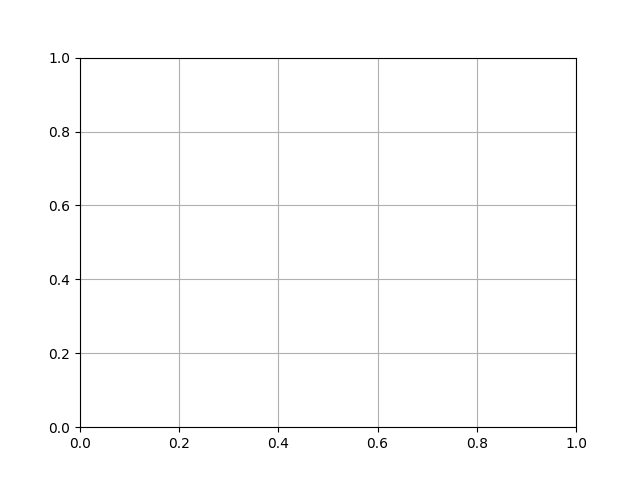

In [14]:
@name_eq("Gain at new price")
def get(investment, ref_price, new_price, K=0.8):
    buy_price = ref_price*K
    nb_action_wo_abondement = investment/buy_price
    nb_action_abondement = np.minimum(nb_action_wo_abondement//4, 10)
    nb_action_totale = nb_action_wo_abondement + nb_action_abondement
    recieved_price_at_ref_price = nb_action_totale * ref_price
    gain_at_ref_price = recieved_price_at_ref_price - investment
    taux_at_ref_price = recieved_price_at_ref_price / investment
    
    price_at_new_price = nb_action_totale * new_price
    gain_at_new_price = price_at_new_price - investment
    taux_at_new_price = price_at_new_price / investment
    return gain_at_new_price#price_at_new_price, recieved_price_at_ref_price, buy_price, nb_action_o_abondement, nb_action_abondement, nb_action_totale, gain_at_ref_price, taux_at_ref_price, gain_at_new_price, taux_at_new_price


wf = WrappedFunction1D(get, 50, 4000, 
                       ref_price=(40, 140),
                       new_price=(40, 140))
wf